파이썬은 Pandas, Matplotlib, Seaborn 등 시각화 라이브러리 제공

###### 막대그래프 그리기

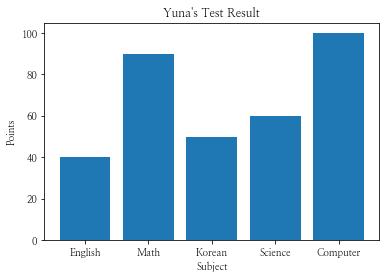

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

#그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()            # 그림객체 생성
ax1 = fig.add_subplot(1,1,1)  # 하위그래프(subplot)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig('./barplot.png')  # 그래프를 이미지로 출력
plt.show()                    # 그래프를 화면으로 출력

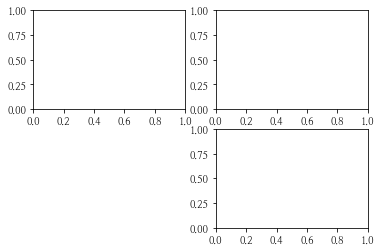

In [4]:
#fig = plt.figure(figsize=(5,2))  # 크기 지정 가능
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,4)     # 그래프를 여러 개 출력 가능 (2행, 2열, 1)

###### 선그래프 그리기

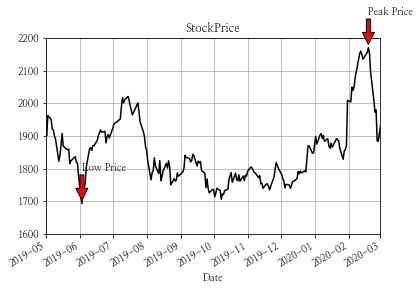

In [5]:
from datetime import datetime
import pandas as pd
import os

#그래프 데이터 
csv_path = os.getenv("HOME") + "/aiffel/data_represent/data/AMZN.csv"
data = pd.read_csv(csv_path ,index_col=0, parse_dates=True)
price = data['Close']

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600,2200])                   # 좌표축 범위 설정
plt.xlim(['2019-05-01','2020-03-01'])

# 주석달기
important_data = [(datetime(2019, 6, 3), "Low Price"),(datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), 
                xytext=(d,price.asof(d)+100),
                arrowprops=dict(facecolor='red'))

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

Pandas의 Series는 선그래프 그리기에 최적의 자료구조.   
price = data['Close']가 Series이다.   
price.plot(ax=ax, style='black') pandas의 plot, ax는 matplotlib에서 정의한 공간   

###### plt.plot()으로 그래프 그리기

figure() -> add_subplot()
plt.plot() : matplotlib이 가장 최근의 figure객체와 그 서브플롯을 그려준다.

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


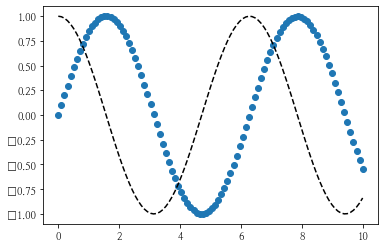

In [6]:
import numpy as np
x = np.linspace(0, 10, 100) 
plt.plot(x, np.sin(x),'o')
plt.plot(x, np.cos(x),'--', color='black') 
plt.show()

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


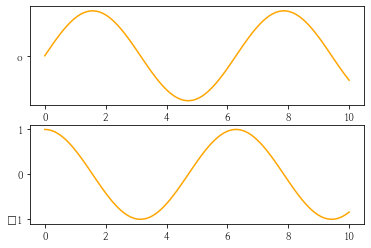

In [7]:
x = np.linspace(0, 10, 100) 

plt.subplot(2,1,1)                  # 그래프 추가하기 (2행, 1열, 1)
plt.plot(x, np.sin(x),'orange','o')

plt.subplot(2,1,2)
plt.plot(x, np.cos(x), 'orange') 
plt.show()

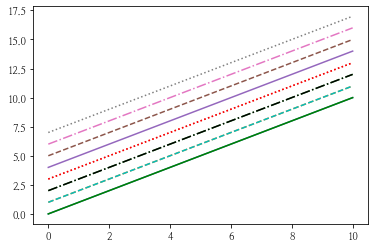

In [8]:
x = np.linspace(0, 10, 100) 

# linestyle
plt.plot(x, x + 0, linestyle='solid') 
plt.plot(x, x + 1, linestyle='dashed') 
plt.plot(x, x + 2, linestyle='dashdot') 
plt.plot(x, x + 3, linestyle='dotted')
plt.plot(x, x + 0, '-g') # solid green 
plt.plot(x, x + 1, '--c') # dashed cyan 
plt.plot(x, x + 2, '-.k') # dashdot black 
plt.plot(x, x + 3, ':r'); # dotted red
plt.plot(x, x + 4, linestyle='-') # solid 
plt.plot(x, x + 5, linestyle='--') # dashed 
plt.plot(x, x + 6, linestyle='-.') # dashdot 
plt.plot(x, x + 7, linestyle=':'); # dotted

###### Pandas의 plot()메소드로 그래프 그리기

pandas.plot메서드 인자   

label: 그래프의 범례이름.   
ax: 그래프를 그릴 matplotlib의 서브플롯 객체.    
style: matplotlib에 전달할 'ko--'같은 스타일의 문자열    
alpha: 투명도 (0 ~1)   
kind: 그래프의 종류: line, bar, barh, kde   
logy: Y축에 대한 로그스케일   
use_index: 객체의 색인을 눈금 이름으로 사용할지의 여부    
rot: 눈금 이름을 로테이션(0 ~ 360)    
xticks, yticks: x축, y축으로 사용할 값    
xlim, ylim: x축, y축 한계    
grid: 축의 그리드 표시할 지 여부    

pandas의 data가 DataFrame일때 plot 메서드 인자   

subplots: 각 DataFrame의 칼럼을 독립된 서브플롯에 그린다.   
sharex: subplots=True면 같은 X축을 공유하고 눈금과 한계를 연결한다.   
sharey: subplots=True면 같은 Y축을 공유한다.   
figsize: 그래프의 크기, 튜플로 지정   
title: 그래프의 제목을 문자열로 지정   
sort_columns: 칼럼을 알파벳 순서로 그린다.   

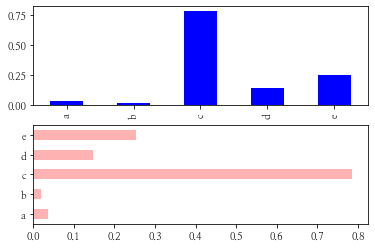

In [9]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(5), index=list('abcde'))
data.plot(kind='bar', ax=axes[0], color='blue', alpha=1)
data.plot(kind='barh', ax=axes[1], color='red', alpha=0.3)

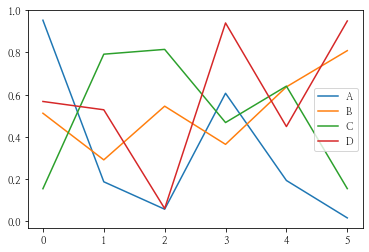

In [10]:
df = pd.DataFrame(np.random.rand(6,4), columns=pd.Index(['A','B','C','D']))
df.plot(kind='line')

Seaborn의 load_dataset()메소드 이용하여 예제 데이터 다운 가능   
https://github.com/mwaskom/seaborn-data csv파일 형태
홈 디렉토리에 seaborn-data폴더 생성됨

In [13]:
import pandas as pd
import seaborn as sns

# 데이터 준비하기
tips = sns.load_dataset("tips")

In [16]:
# 데이터 살펴보기
# pandas의 dataframe 이용

df = pd.DataFrame(tips)
df.head()

# sex, smoker, day, time 등 범주형 데이터

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
df.shape

(244, 7)

In [18]:
df.describe()
# total_bill, tip, size(테이블 인원) 수치형 데이터

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [20]:
# 범주형 데이터의 카테고리별 개수 확인해보기
print(df['sex'].value_counts())
print("===========================")

print(df['time'].value_counts())
print("===========================")

print(df['smoker'].value_counts())
print("===========================")

print(df['day'].value_counts())
print("===========================")

print(df['size'].value_counts())
print("===========================")

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64


###### 데이터 종류에 따라 사용되는 그래프의 종류

In [21]:
# 범주형 데이터는 주로 막대 그래프 사용
# pandas와 matplotlib를 활용하는 방법
# pandas데이터를 matplotlib에 바로 사용불가
# x, y에 각각 series, list 형태로 넣어준다.
# tip칼럼을 성별에 대한 평균을 알아보기

grouped = df['tip'].groupby(df['sex'])  # df는 데이터 객체, 키 = 칼럼
grouped.mean() # 성별에 따른 팁의 평균

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [22]:
grouped.size() # 성별에 따른 데이터 량(팁 횟수)

sex
Male      157
Female     87
Name: tip, dtype: int64

No handles with labels found to put in legend.


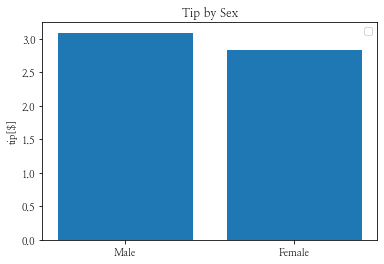

In [23]:
import numpy as np
sex = dict(grouped.mean())
x = list(sex.keys())
y = list(sex.values())

plt.bar(x, y)
plt.ylabel('tip[$]')
plt.title('Tip by Sex')
plt.legend()

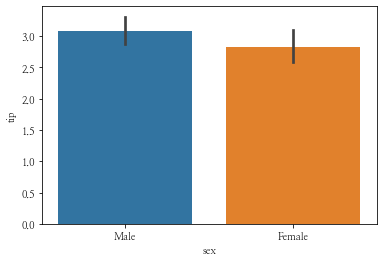

In [24]:
# Seaborn과 matplotlib을 활용하는 방법
sns.barplot(data=df, x='sex', y='tip') # 헐, 간단

Text(0.5, 1.0, 'Tip  by sex')

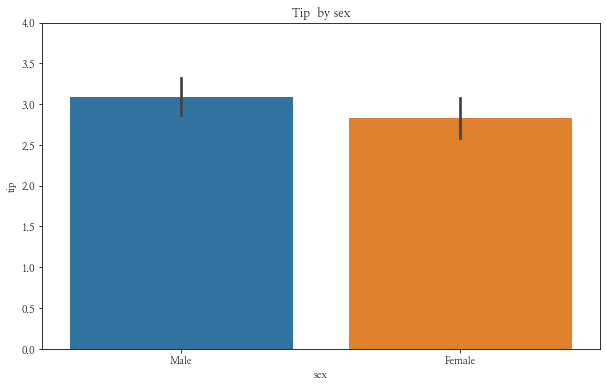

In [25]:
# matplotlib과 함께 사용가능

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='sex', y='tip')
plt.ylim(0, 4)
plt.title('Tip  by sex')

Text(0.5, 1.0, 'Tip  by day')

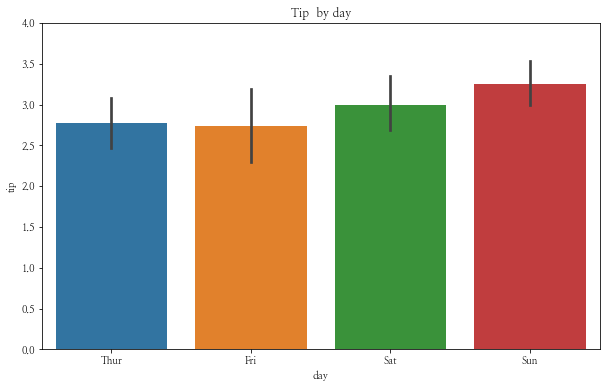

In [26]:
# 요일에 따른 tips 그래프

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0, 4)
plt.title('Tip  by day')

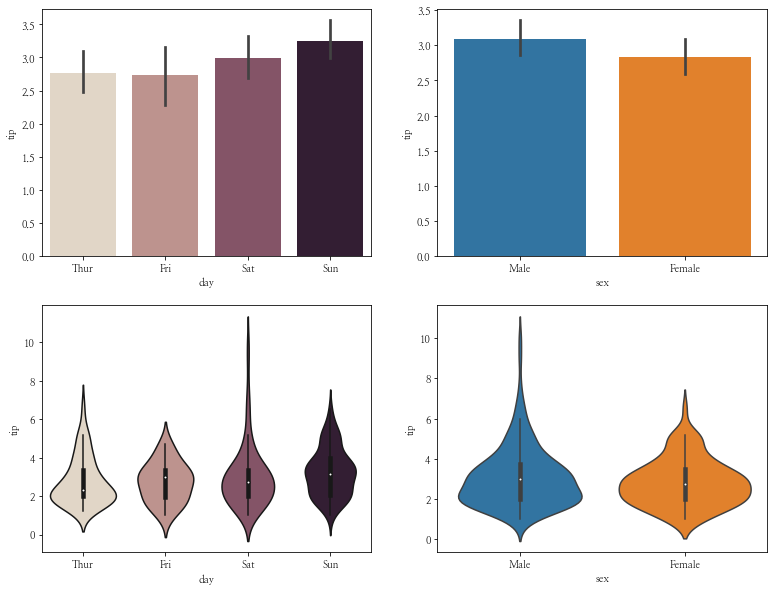

In [27]:
# violineplot, subplot, palette옵션 활용

fig = plt.figure(figsize=(13,10))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip',palette="ch:.25")
ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')
ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip')
ax3 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip',palette="ch:.25")

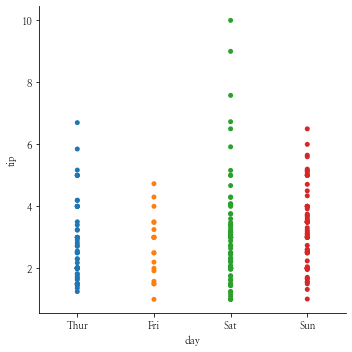

In [28]:
# catplot 사용

sns.catplot(x="day", y="tip", jitter=False, data=tips)

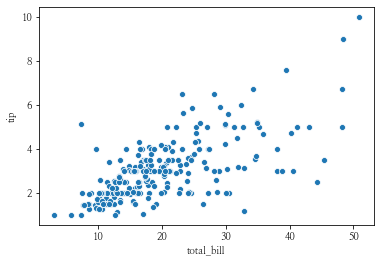

In [29]:
# 수치형 데이터는 산점도 그래프(scatterplot) 혹은 선 그래프 많이 사용
# 요일(day)에 따른 tip과 total_bill의 관계를 시각화하기

sns.scatterplot(data=df , x='total_bill', y='tip', palette="ch:r=-.2,d=.3_r")

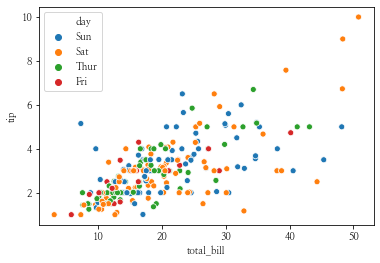

In [30]:
sns.scatterplot(data=df , x='total_bill', y='tip', hue='day')

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


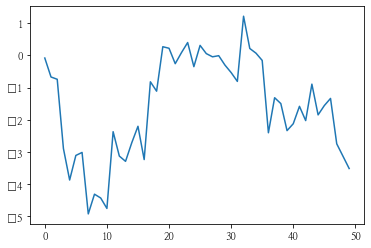

In [31]:
# 선그래프
plt.plot(np.random.randn(50).cumsum())

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


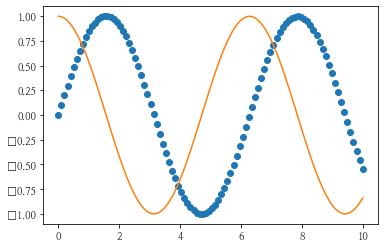

In [32]:
x = np.linspace(0, 10, 100) 
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x)) 
plt.show()

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


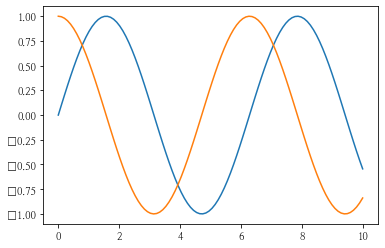

In [33]:
# seaborn을 활용하여 그리기

sns.lineplot(x, np.sin(x))
sns.lineplot(x, np.cos(x))

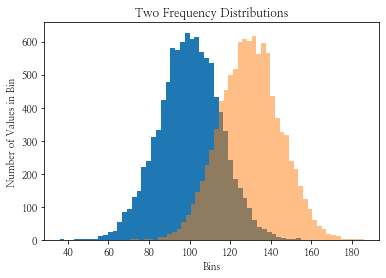

In [34]:
# 히스토그램 - 도수분포표를 그래프로 나타낸 것
# 가로축 - 계급 : 변수의 구간, bin(or bucket)
# 세로축 - 도수 : 빈도수, frequency
# 전체 총량 - n

# x1과 x2의 평균은 100, 130
# 도수를 50개 구간으로 표시, 확률 밀도가 아닌 빈도로 표기

#그래프 데이터 
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False)
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()

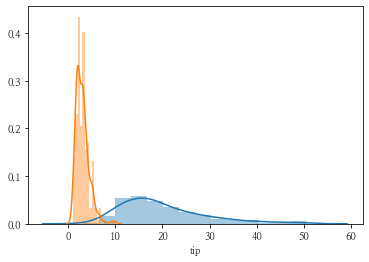

In [35]:
# total_bill과 tips에 대한 히스토그램

sns.distplot(df['total_bill'])
sns.distplot(df['tip'])

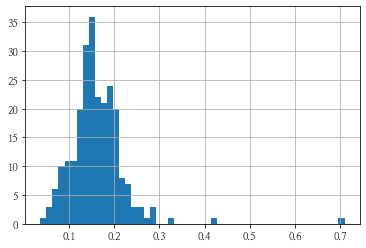

In [36]:
# 전체 결제 금액 대비 팁의 비율에 대한 히스토그램

df['tip_pct'] = df['tip'] / df['total_bill']
df['tip_pct'].hist(bins=50)

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


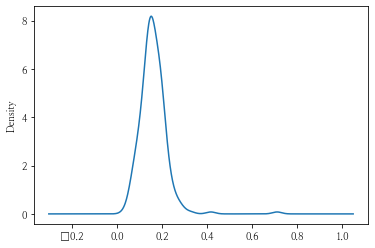

In [37]:
df['tip_pct'].plot(kind='kde')

# kind='kde' 확률 밀도 그래프
# 밀도 그래프 : 연속된 확률 분포를 나타낸다.
# 일반적으로 kernels메소드를 섞어서 이 분포를 근사하는 식으로 그린다.
# 정규분포로 나타낼 수 있다.
# 밀도 그래프는 KDE(Kernel Density Estimate)커널 밀도 추정 그래프이다.

##### 시계열 데이터 시각화하기

In [38]:
csv_path = os.getenv("HOME") + "/aiffel/data_represent/data/flights.csv"
data = pd.read_csv(csv_path)
flights = pd.DataFrame(data)
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


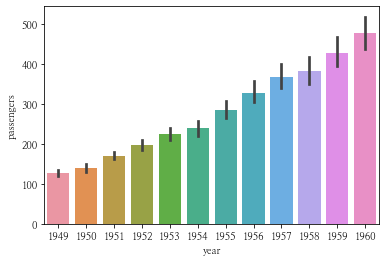

In [39]:
sns.barplot(data=flights, x='year', y='passengers')

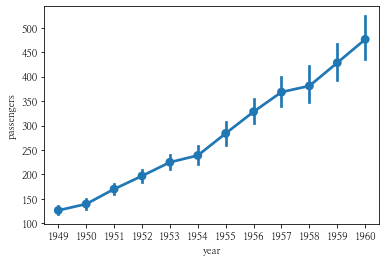

In [40]:
sns.pointplot(data=flights, x='year', y='passengers')

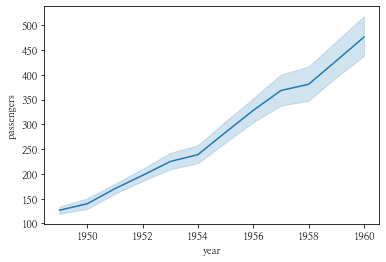

In [41]:
sns.lineplot(data=flights, x='year', y='passengers')

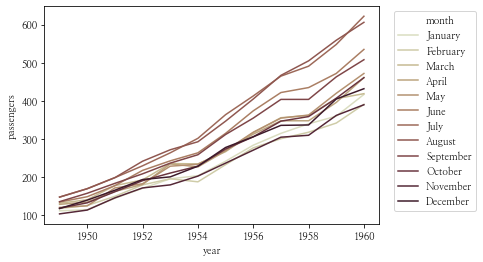

In [42]:
# 달별로 나누기 보기 위해 hue인자에 'month' 할당

sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='ch:.50')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기

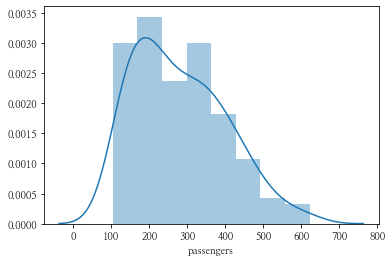

In [43]:
sns.distplot(flights['passengers'])

In [44]:
# heatmap : 데이터를 색상으로 나타낸 것
# 데이터를 pivot하기
# pivot : 어떤 축, 점을 기준으로 바꾸다.
# pandasd의 df의 pivot()사용
# flights의 탑승객 수를 year와 month로 pivot하기

pivot = flights.pivot(index='year', columns='month', values='passengers')
pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


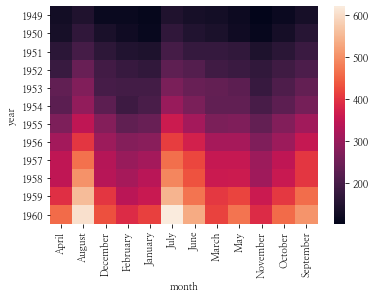

In [45]:
sns.heatmap(pivot)

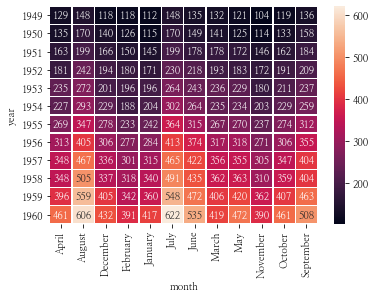

In [46]:
sns.heatmap(pivot, linewidths=.2, annot=True, fmt="d")

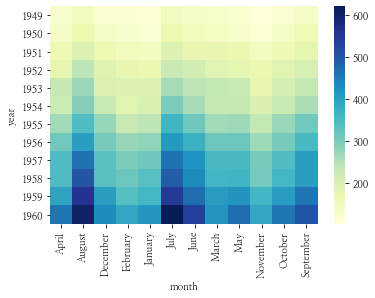

In [47]:
sns.heatmap(pivot, cmap="YlGnBu")